In [1]:
import spacy
import en_core_web_sm
import pandas as pd
import spacytextblob.spacytextblob as spacytextblob
import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import glob


dataframes = []
json_files = glob.glob('/Users/User/Downloads/Data_Reddit/opiates_submissions*.json')

for json_file in json_files:
    temp = pd.read_json(json_file)
    dataframes.append(temp)

df = pd.concat(dataframes, ignore_index=True)

display(df.head())
display(df.columns)
display(df['selftext'])

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

nlp.select_pipes(disable = ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner'])

,all_awardings,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,can_mod_post,contest_mode,...,call_to_action,poll_data,discussion_type,collections,is_gallery,gallery_data,steward_reports,removed_by,og_description,og_title
0,[],PillMomThrow,None,[],None,text,t2_16jbmp,0.0,0.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],ilovegettinkunted,None,[],None,text,t2_3zgidfc4,0.0,0.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],-ShellOfLight-,None,[],None,text,t2_2qjfyuwp,0.0,0.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],la-nina-central,None,[],None,text,t2_77z2ss9,0.0,0.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],kinda_sober2,None,[],None,text,t2_qm3pf2f,0.0,0.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index(['all_awardings', 'author', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_text', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'can_mod_post',
       'contest_mode',
       ...
       'call_to_action', 'poll_data', 'discussion_type', 'collections',
       'is_gallery', 'gallery_data', 'steward_reports', 'removed_by',
       'og_description', 'og_title'],
      dtype='object', length=114)

0         I've detailed every aspect of this situation o...
1         I'm in the UK there's been a extremely small b...
2         Its crazy that im like this now because i neve...
3         It’s one of those situations that I haven’t se...
4         Except because I have certain health problems,...
                                ...                        
255333                                            [removed]
255334    I had a serious surgery and the doctors left m...
255335    Something I noticed it's that not too many hom...
255336    Trying to bring this sub back check it out and...
255337    Picked up some blues today to celebrate my bir...
Name: selftext, Length: 255338, dtype: object

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [2]:
df = df.loc[(df['selftext'] != '') & (df['selftext'] != '[deleted]') & (df['selftext'] != '[removed]') & (df['author'] != '[deleted]') & (df['selftext'] != 'None')]
df = df.dropna(subset=['selftext']).reset_index(drop=True)
df.reset_index(inplace=True, drop=True)

display(df['selftext'])

0         I've detailed every aspect of this situation o...
1         I'm in the UK there's been a extremely small b...
2         Its crazy that im like this now because i neve...
3         It’s one of those situations that I haven’t se...
4         Except because I have certain health problems,...
                                ...                        
146968    I like this sub alot but honestly it was reall...
146969    I had a serious surgery and the doctors left m...
146970    Something I noticed it's that not too many hom...
146971    Trying to bring this sub back check it out and...
146972    Picked up some blues today to celebrate my bir...
Name: selftext, Length: 146973, dtype: object

In [3]:
results = []

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    text = row['selftext']
    blob = nlp(text)._.blob
    results.append(blob)

    # Print the status by overwriting the same row
    status = f"Processing row {index + 1} out of {len(df)}"
    print(status, end='\r')  # The end='\r' overwrites the same line in the console

# Add the results as a new column in the DataFrame
df['blob'] = results

df['polarity'] = df['blob'].apply(lambda blob: blob.polarity)
df['subjectivity'] = df['blob'].apply(lambda blob: blob.subjectivity)

df['formatted_date'] = df['created_utc'].apply(lambda date: datetime.datetime.fromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S'))
df['month'] = df['formatted_date'].apply(lambda date: date.split('-')[1])
df['year'] = df['formatted_date'].apply(lambda date: date.split('-')[0])

display(df['polarity'].describe())
display(df['subjectivity'].describe())

display(df.head())

count    146973.000000
mean          0.068770
std           0.196045
min          -1.000000
25%          -0.027778
50%           0.057692
75%           0.167045
max           1.000000
Name: polarity, dtype: float64

count    146973.000000
mean          0.478845
std           0.177681
min           0.000000
25%           0.400000
50%           0.493684
75%           0.575521
max           1.000000
Name: subjectivity, dtype: float64

,all_awardings,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,can_mod_post,contest_mode,...,steward_reports,removed_by,og_description,og_title,blob,polarity,subjectivity,formatted_date,month,year
0,[],PillMomThrow,None,[],None,text,t2_16jbmp,0.0,0.0,False,...,NaN,NaN,NaN,NaN,"(I, ', v, e, , d, e, t, a, i, l, e, d, , e, ...",0.058401,0.455018,2019-06-23 20:18:29,06,2019
1,[],ilovegettinkunted,None,[],None,text,t2_3zgidfc4,0.0,0.0,False,...,NaN,NaN,NaN,NaN,"(I, ', m, , i, n, , t, h, e, , U, K, , t, ...",-0.002778,0.587500,2019-06-23 20:09:52,06,2019
2,[],-ShellOfLight-,None,[],None,text,t2_2qjfyuwp,0.0,0.0,False,...,NaN,NaN,NaN,NaN,"(I, t, s, , c, r, a, z, y, , t, h, a, t, , ...",-0.300000,0.950000,2019-06-23 20:07:54,06,2019
3,[],la-nina-central,None,[],None,text,t2_77z2ss9,0.0,0.0,False,...,NaN,NaN,NaN,NaN,"(I, t, ’, s, , o, n, e, , o, f, , t, h, o, ...",0.021591,0.487121,2019-06-23 19:45:38,06,2019
4,[],kinda_sober2,None,[],None,text,t2_qm3pf2f,0.0,0.0,False,...,NaN,NaN,NaN,NaN,"(E, x, c, e, p, t, , b, e, c, a, u, s, e, , ...",-0.077922,0.523761,2019-06-23 19:43:09,06,2019


In [4]:
df_commenters = df.groupby('author').agg({'polarity': ['mean', 'count']})

df_commenters = df_commenters[df_commenters['polarity']['count'] > 75]

df_commenters = df_commenters.sort_values(('polarity', 'mean'), ascending=False)

display(df_commenters)

polarity      
                          mean count
author                              
spinderella69         0.170998   139
XBropiate91           0.148310    80
DeViN_tHa_DuDe        0.142478    85
Southern_psychonaut   0.122747   138
traceyh415            0.117873   169
SpayceGhost           0.117625    76
lt420lt               0.112069   140
DopeGuy1234           0.111734   164
benzodiazepines       0.108470   140
AngryChair007         0.107397    84
HostDisorder          0.106425   105
chasingd0pamine       0.095699    76
LsWee_D               0.095461    81
FashionablyFake       0.092372   145
OxyJay                0.089921    91
ohgotdamn             0.084855    93
Jangles710            0.078490    76
ApprovedByAvishay     0.077136    83
travs3dpe             0.075426    83
dori_88               0.075191   214
Dopana                0.074208   239
KickerS12X            0.071960    97
realcat67             0.071638   101
throwaway666718       0.066215    77
Psychonaut424         0.066074   153
2ndwaveobserver       0.065706    78
Gudfeels31            0.064517    89
EskomojoE             0.064005    81
iAmAPickleYo          0.056765   235
igottheblues1         0.055747   126
KrewTawns             0.054915    80
St_agustine           0.054433   131
MetroMaker            0.052841   351
sloan_fitch           0.052025   136
northwest_vae         0.048996    80
Cujuabled             0.048283    78
UsamaBinNoddin        0.046577   127
opiate_lifer          0.044049   120
DopelesHopeFiendsyke  0.042406    82
jace46555             0.040365   100
benzopiate            0.038848    91
K-HoIe                0.038506    83
chasing-d0pamine      0.037139   118
Gutterlungz1          0.033473   101
keepforgettingname6   0.033192    97
CYPROXY               0.032297   129
Layne_Cobain          0.030395   143
everything_is_still   0.030357   120
smart4agirl666        0.023436    78
berryfrezh            0.018700   136
chilltownb            0.017189    92
muchachaganj          0.016653    86
DragonChaser760       0.014330   126
morbo2000             0.011736   118
ASavageLost           0.009898    91
hotdogboy44           0.008052   111
hisdudeness94         0.007036    84
roxys4effy           -0.020038    95
hhz                  -0.035291    88

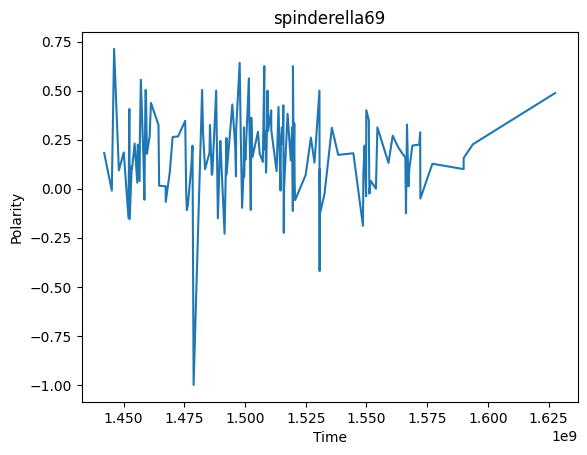

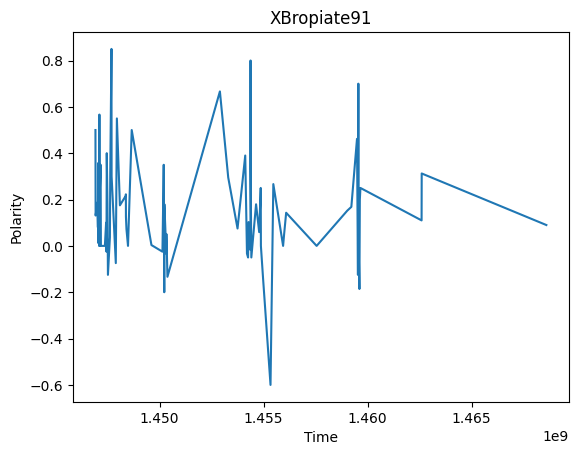

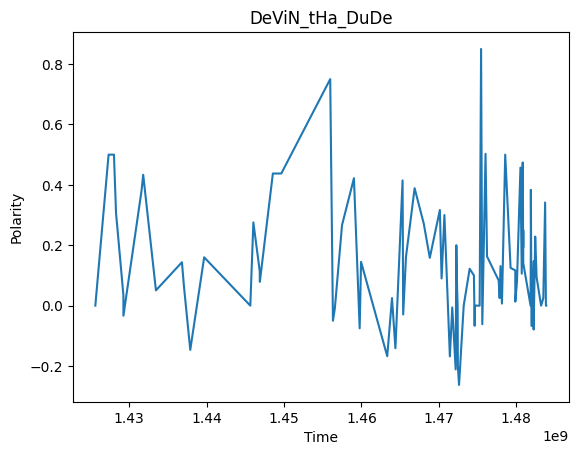

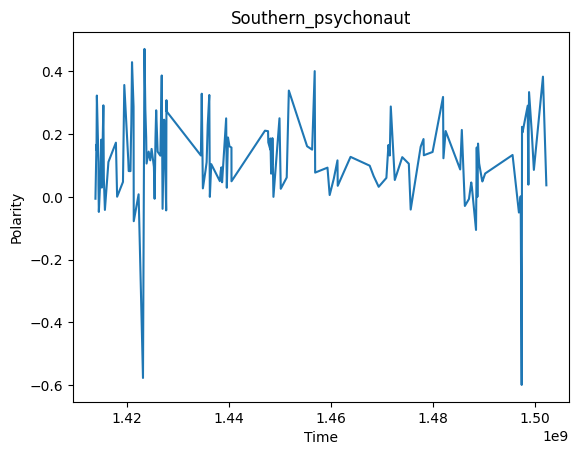

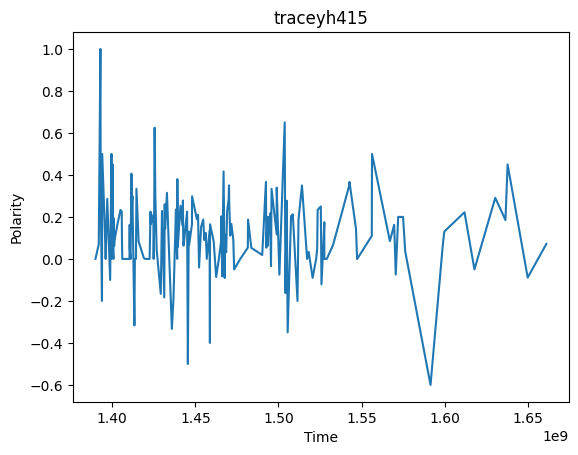

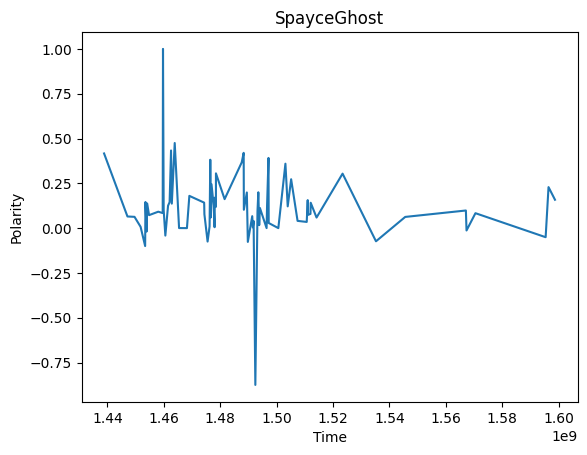

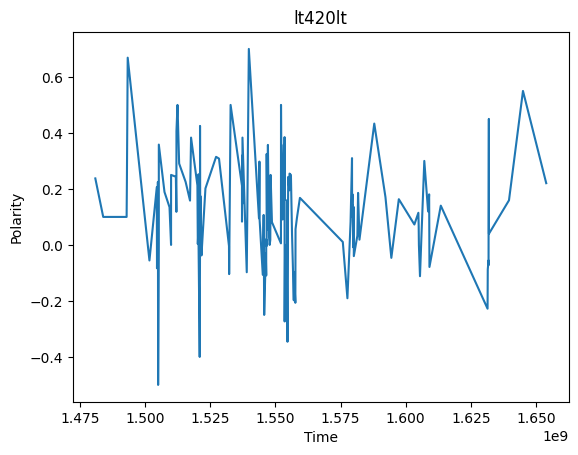

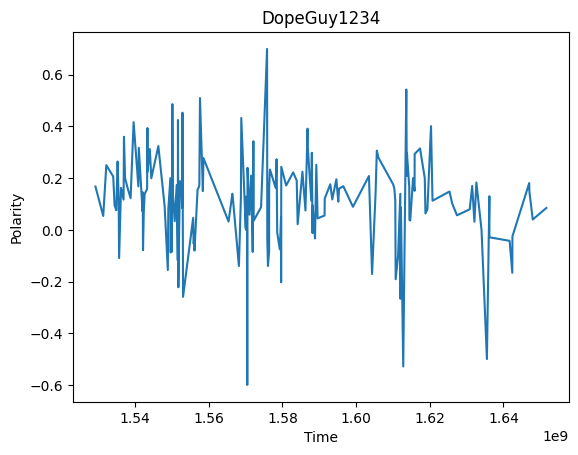

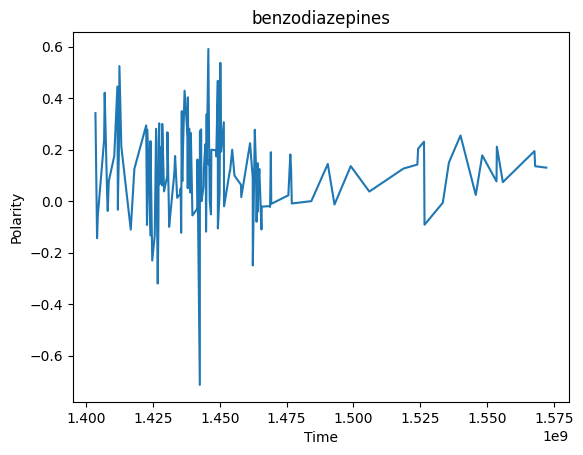

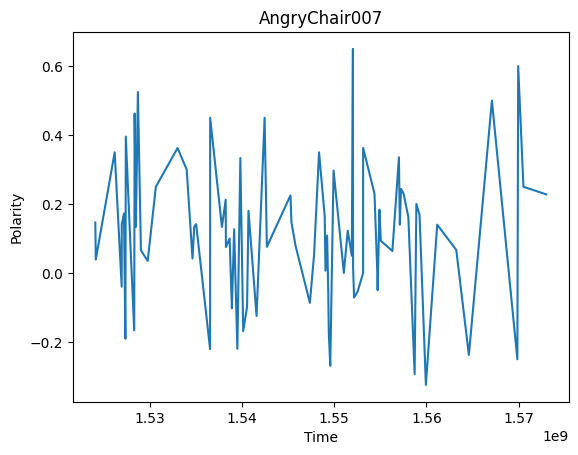

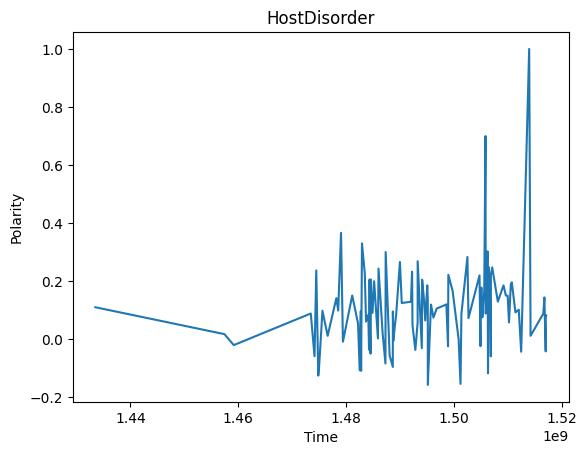

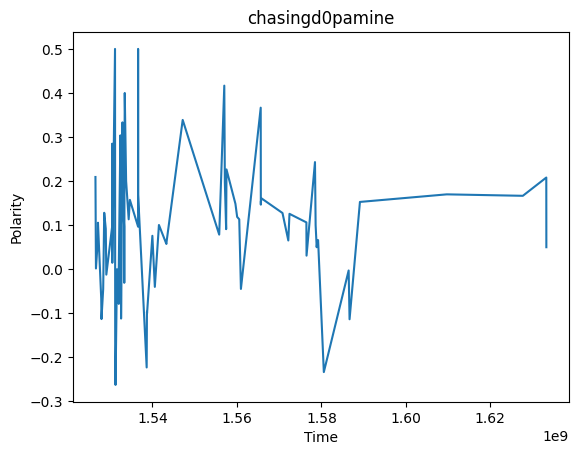

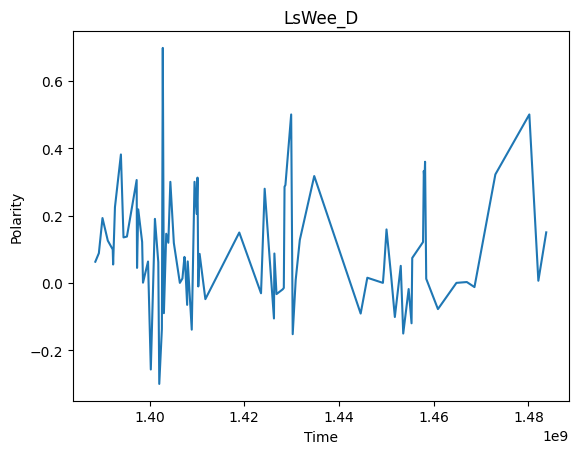

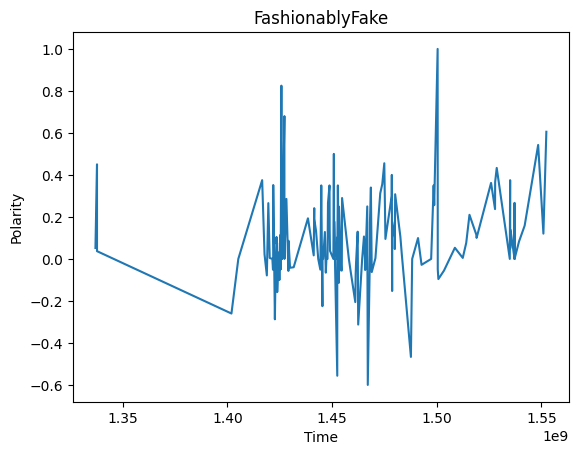

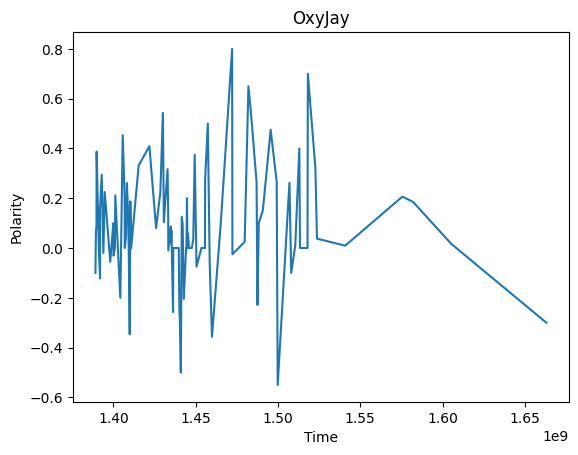

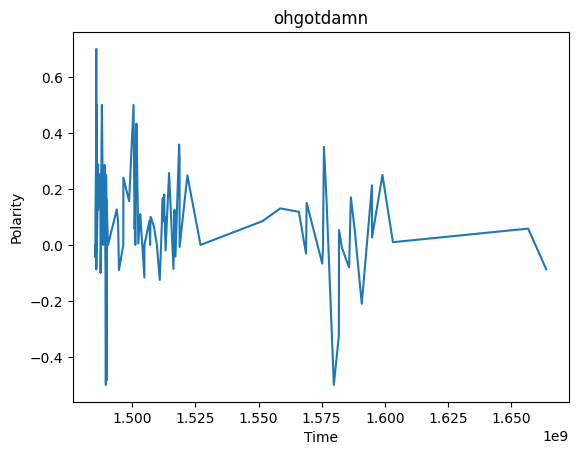

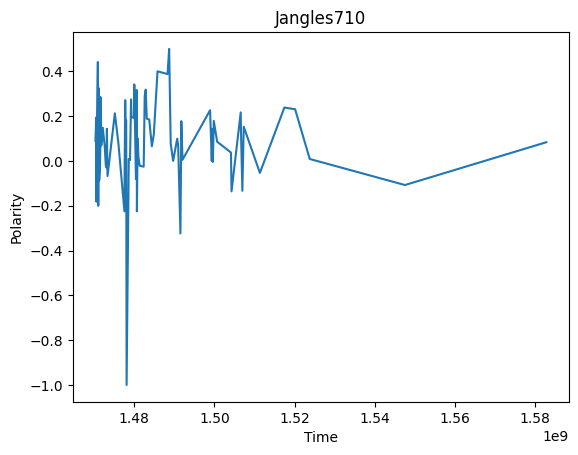

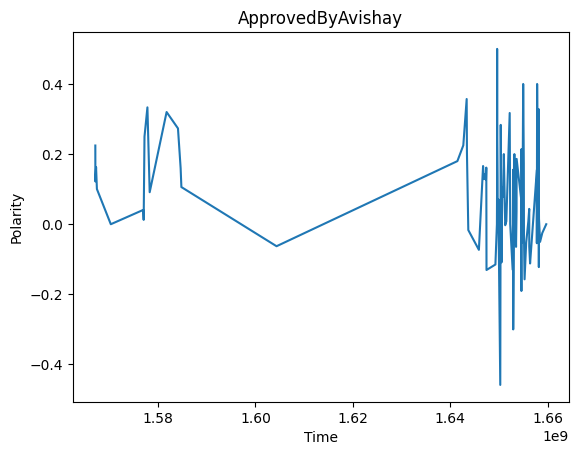

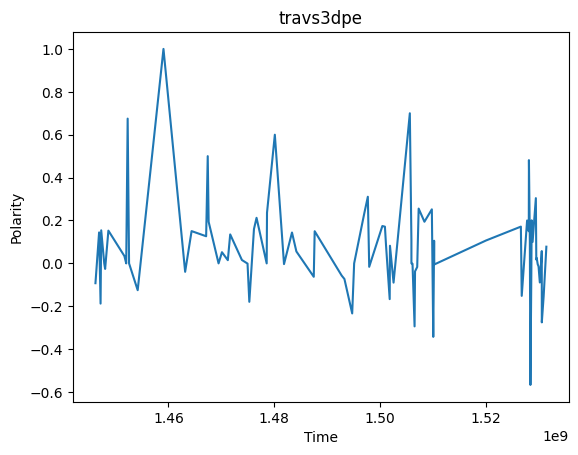

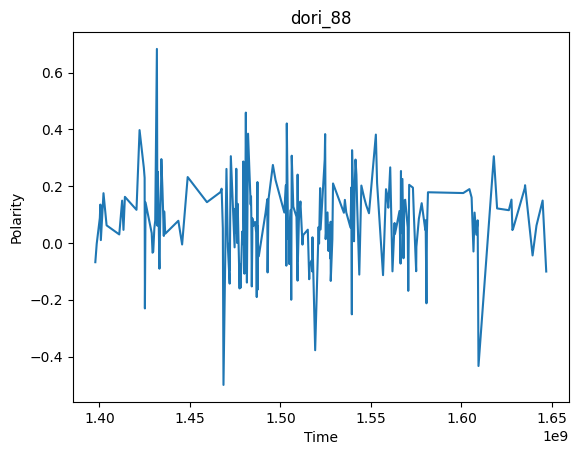

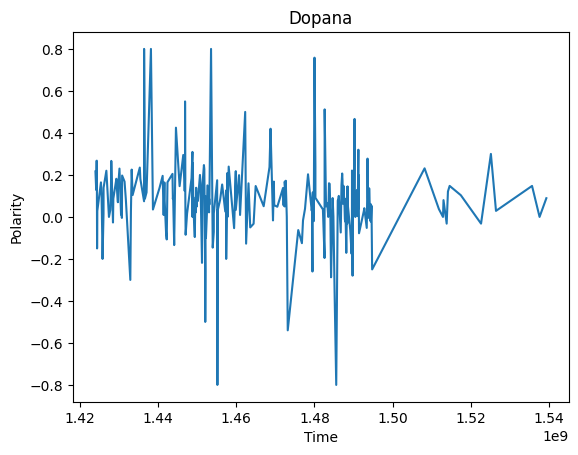

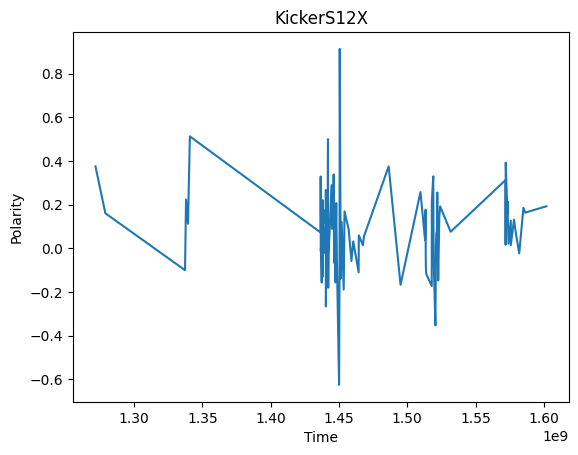

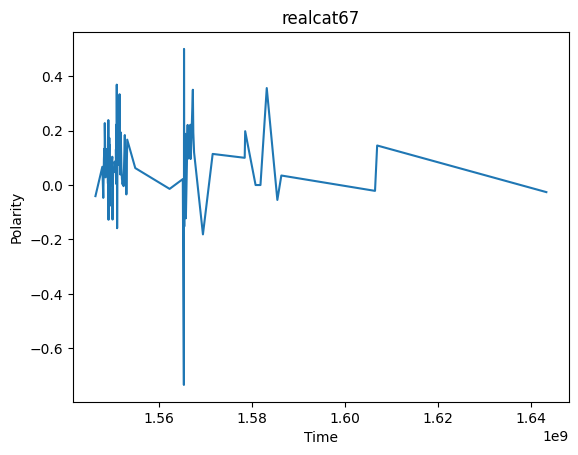

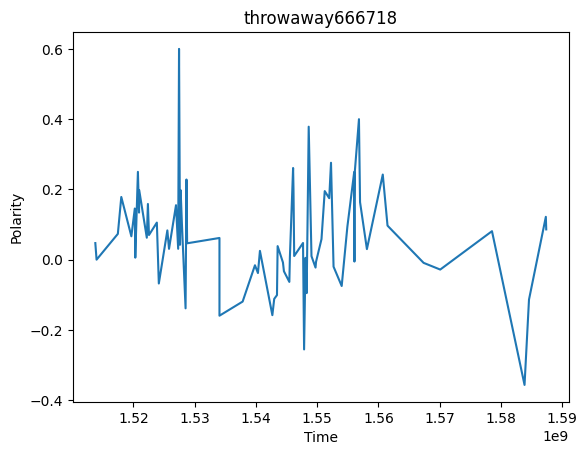

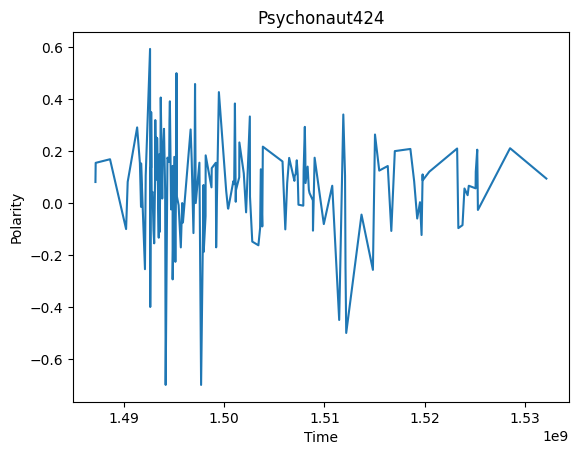

In [5]:

# Iterate through the top 25 commenters (assuming you have already calculated df_commenters)
for i in range(25):
    user = df_commenters.index[i]

    # Sort the DataFrame by 'created_utc' for the specific user
    user_df = df[df['author'] == user].sort_values(by='created_utc')

    # Plot the data for the user
    plt.plot(user_df['created_utc'], user_df['polarity'])
    plt.xlabel('Time')
    plt.ylabel('Polarity')
    plt.title(user)
    plt.show()

# If you want to maintain the overall DataFrame as-is, you don't need to make changes to it.
# The user-specific sorted DataFrames are temporary for plotting purposes.


In [6]:
i = 6 # 6, 8
display(df_commenters.index[i])
#display all the posts for the top poster
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

display(df[df['author'] == df_commenters.index[i]]['selftext'])

'lt420lt'

1325                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    